In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from matplotlib import pylab as plt
import matplotlib
from matplotlib.colors import ListedColormap
%matplotlib inline

import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [9]:
"..data/WA_Fn-UseC_-HR-Employee-Attrition.csv"

SyntaxError: invalid syntax (455931076.py, line 1)

In [11]:
df = pd.read_csv("../data/WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [12]:
print(df['StandardHours'].value_counts())

80    1470
Name: StandardHours, dtype: int64


In [13]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


# Zero Variance Check

In [14]:
df.nunique().nsmallest(10)

EmployeeCount        1
Over18               1
StandardHours        1
Attrition            2
Gender               2
OverTime             2
PerformanceRating    2
BusinessTravel       3
Department           3
MaritalStatus        3
dtype: int64

In [15]:
df = df.drop(['EmployeeCount','StandardHours','Over18'], axis=1)

**1. basic**

In [16]:
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2


In [17]:
df.info

<bound method DataFrame.info of       Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education Education

In [18]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [19]:
df.describe(include=object).T

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
EducationField,1470,6,Life Sciences,606
Gender,1470,2,Male,882
JobRole,1470,9,Sales Executive,326
MaritalStatus,1470,3,Married,673
OverTime,1470,2,No,1054


# Missing value Check

In [20]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

# Duplicate Check

In [21]:
df[df.duplicated()]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


# Correlation Check¶ - (delete variable)

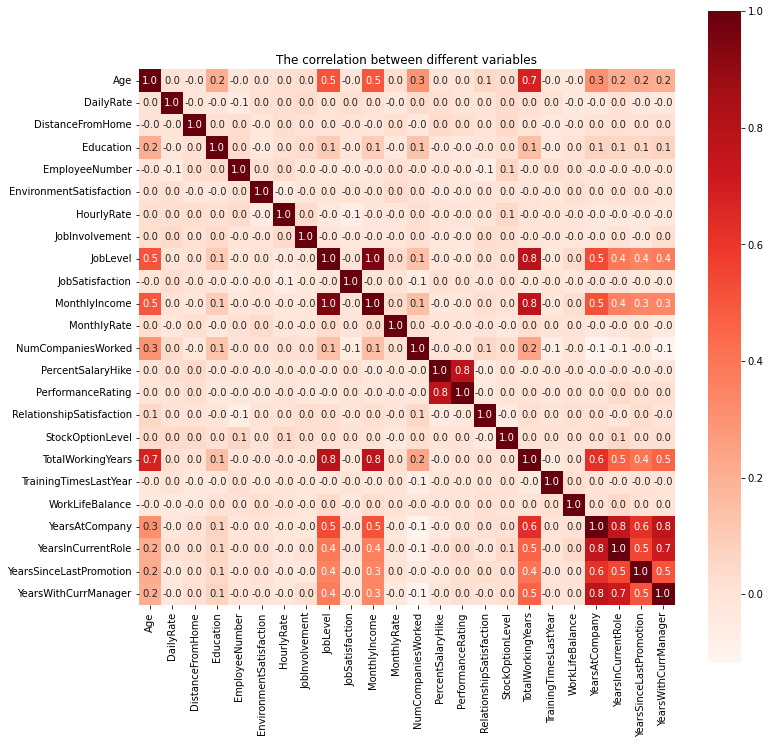

In [26]:
corr = df.corr()
plt.figure(figsize=(12,12))
ax = plt.axes()
hmap = sns.heatmap(corr,cbar=True,square=True,fmt='.1f',annot=True,cmap='Reds')
figure = hmap.get_figure()
ax.set_title("The correlation between different variables")
figure.savefig(r'../figures/correaltion_matrix1.png', dpi=300,)

In [29]:
df_corr = df[['JobLevel','TotalWorkingYears','MonthlyIncome','YearsInCurrentRole', 'YearsWithCurrManager','YearsAtCompany' ]]

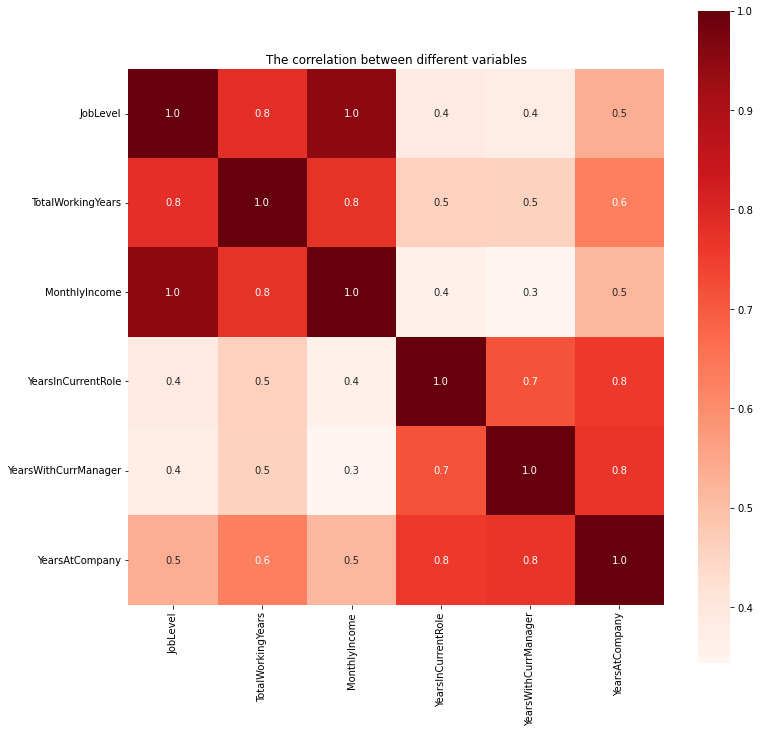

In [30]:
corr = df_corr.corr()
plt.figure(figsize=(12,12))
ax = plt.axes()
hmap = sns.heatmap(corr,cbar=True,square=True,fmt='.1f',annot=True,cmap='Reds')
figure = hmap.get_figure()
ax.set_title("The correlation between different variables")
figure.savefig(f'../figures/correaltion_matrix_high.png', dpi=300)

From the figure above we summarize several initial patterns:
1. Employees with higher PerformanceRating are more likely to get larger raises in
salaries.
2. TotalWorkingYear, YearsInCurrentRole and YearsInCompany are all highly positive
correlated. But they do not have significant influence on other variables.


# Visualize the target variable：Check the balance

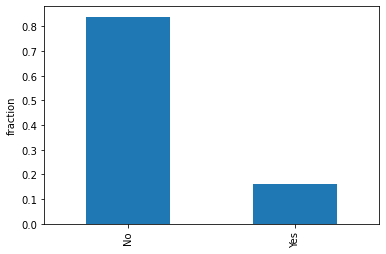

In [33]:
from matplotlib import pylab as plt

pd.value_counts(df['Attrition'],normalize=True).plot.bar()
plt.ylabel('fraction')

plt.savefig(f'../figures/imbalance.png', dpi=300)
plt.text(.05,.05,'')
plt.show()

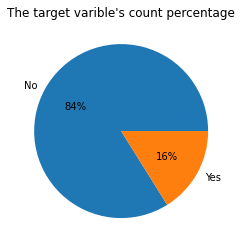

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.pie(df['Attrition'].value_counts()/len(df),labels = ['No','Yes'], autopct='%.0f%%')
plt.title("The target varible's count percentage")

plt.savefig('../figures/imbalance-pie.png', dpi=300)
plt.show()

In [193]:
print(df['Attrition'].value_counts()/len(df))

No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64


In [194]:
df.info

<bound method DataFrame.info of       Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education Education

**2.EDA**

In [163]:
numCols = df.select_dtypes([np.number]).columns
numCols

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [164]:
numCols1 = df.columns
numCols1

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

The dataset has 1470 observations with 26 numerical variables
and 9 categorical variables. Among the data, 1237 (84%) observations choose not to leave
the company, showing the dataset is unbalanced.

In [165]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

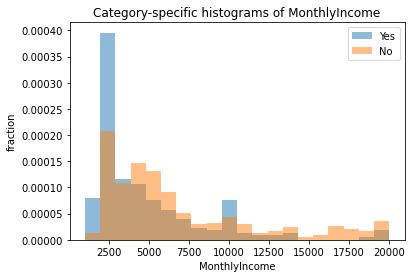

In [35]:
import matplotlib
from matplotlib import pylab as plt

categories = df['Attrition'].unique()
bin_range = (df['MonthlyIncome'].min(),df['MonthlyIncome'].max())

for c in categories:
    plt.hist(df[df['Attrition']==c]['MonthlyIncome'],alpha=0.5,label=c,range=bin_range,bins=20,density=True)
plt.legend()
plt.ylabel('fraction')
plt.xlabel('MonthlyIncome')
plt.title('Category-specific histograms of MonthlyIncome')
plt.savefig('../figures/Category-specific histograms of MonthlyIncome.png', dpi=300)
plt.show()

<Figure size 648x792 with 0 Axes>

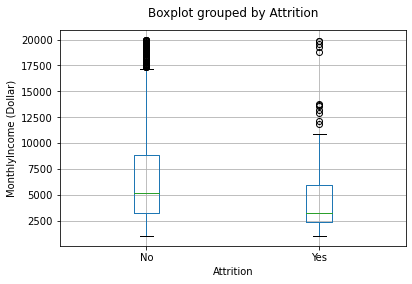

In [36]:
fig = plt.figure(figsize=(9, 11))
df[['MonthlyIncome','Attrition']].boxplot(by='Attrition')
plt.ylabel('MonthlyIncome (Dollar)')
plt.xlabel('Attrition')
plt.title(' ')

plt.savefig('../figures/boxplot.png', dpi=300,bbox_inches='tight')
plt.show()

In [39]:
count_matrix = df.groupby(['JobRole', 'Attrition']).size().unstack()
#print(count_matrix)

count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
print(count_matrix_norm)

Attrition                        No       Yes
JobRole                                      
Healthcare Representative  0.931298  0.068702
Human Resources            0.769231  0.230769
Laboratory Technician      0.760618  0.239382
Manager                    0.950980  0.049020
Manufacturing Director     0.931034  0.068966
Research Director          0.975000  0.025000
Research Scientist         0.839041  0.160959
Sales Executive            0.825153  0.174847
Sales Representative       0.602410  0.397590


<Figure size 360x216 with 0 Axes>

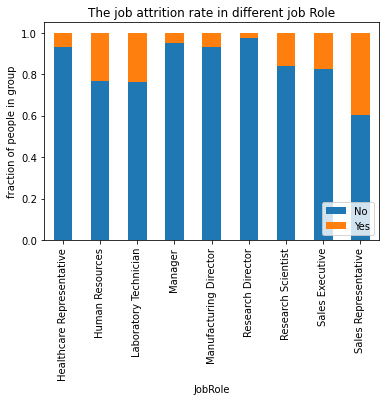

In [41]:
plt.figure(figsize=(5,3))
count_matrix_norm.plot(kind='bar', stacked=True)
plt.ylabel('fraction of people in group')
plt.legend(loc=4)
plt.title('The job attrition rate in different job Role')
plt.savefig('../figures/bar.png', dpi=300,bbox_inches='tight')

plt.show()

In [42]:
count_matrix = df.groupby(['BusinessTravel', 'Attrition']).size().unstack()
#print(count_matrix)

count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
print(count_matrix_norm)

Attrition                No       Yes
BusinessTravel                       
Non-Travel         0.920000  0.080000
Travel_Frequently  0.750903  0.249097
Travel_Rarely      0.850431  0.149569


Most employees who travel rarely don't leave the company. From the plot we can tell, sending employees on business travels or not doesn't really make much of a difference and doesn't have a significant effect on attrition.

**Data preprocessing**

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

Discuss how you split the dataset and why.
 imbalace striafy

In [172]:
# stratified K Fold: variation in balance is very small (4th decimal point)
from sklearn.model_selection import StratifiedKFold
random_state = 42

X = df.drop(columns = ['Attrition'])
y = df[['Attrition']]

# stratified train-test split
X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.2,stratify=y,random_state=random_state)
print('test balance:',np.unique(y_test,return_counts=True))

# do StratifiedKFold split on other
kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=random_state)
for train_index, val_index in kf.split(X_other,y_other):
    print('new fold')
    X_train = X_other.iloc[train_index]
    y_train = y_other.iloc[train_index]
    X_val = X_other.iloc[val_index]
    y_val = y_other.iloc[val_index]
    print(np.unique(y_train,return_counts=True))
    print(np.unique(y_val,return_counts=True))

test balance: (array(['No', 'Yes'], dtype=object), array([247,  47]))
new fold
(array(['No', 'Yes'], dtype=object), array([788, 152]))
(array(['No', 'Yes'], dtype=object), array([198,  38]))
new fold
(array(['No', 'Yes'], dtype=object), array([789, 152]))
(array(['No', 'Yes'], dtype=object), array([197,  38]))
new fold
(array(['No', 'Yes'], dtype=object), array([789, 152]))
(array(['No', 'Yes'], dtype=object), array([197,  38]))
new fold
(array(['No', 'Yes'], dtype=object), array([789, 152]))
(array(['No', 'Yes'], dtype=object), array([197,  38]))
new fold
(array(['No', 'Yes'], dtype=object), array([789, 152]))
(array(['No', 'Yes'], dtype=object), array([197,  38]))


In [173]:
numerical = ['Age', 'DailyRate',  'JobSatisfaction','MonthlyIncome', 'PerformanceRating','WorkLifeBalance', 'YearsAtCompany', 'Attrition_numerical']

In [174]:
# Empty list to store columns with categorical data
categorical = []
for col, value in X_train.iteritems():
    if value.dtype == 'object':
        categorical.append(col)

# Store the numerical columns in a list numerical
numerical = X_train.columns.difference(categorical)
numerical

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [175]:
categorical


['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [176]:
std_ftrs = [ 'DistanceFromHome','NumCompaniesWorked', 'YearsAtCompany','YearsSinceLastPromotion']

['Age','MonthlyIncome','MonthlyRate','HourlyRate','DailyRate']



['Age', 'MonthlyIncome', 'MonthlyRate', 'HourlyRate', 'DailyRate']

In [195]:
std_ftrs = ['Age','DailyRate', 'DistanceFromHome','HourlyRate','MonthlyIncome','MonthlyRate','NumCompaniesWorked', 'YearsAtCompany','YearsSinceLastPromotion','TotalWorkingYears','YearsInCurrentRole','YearsWithCurrManager','PercentSalaryHike','EmployeeNumber']

ordinal_ftrs = ['Education', 'EnvironmentSatisfaction','JobInvolvement','JobSatisfaction','PerformanceRating','RelationshipSatisfaction', 'StockOptionLevel', 'TrainingTimesLastYear','WorkLifeBalance','JobLevel']
ordinal_cat =[['1','2','3','4','5'],['1','2','3','4'],['1','2','3','4'],['1','2','3','4'],['1','2','3','4'],['1','2','3','4'],['0','1','2','3'],['0','1','2','3','4','5','6'],['1','2','3','4'],['1','2','3','4','5']]


onehot_ftrs = categorical




# collect all the encoders
preprocessor = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(categories = ordinal_cat), ordinal_ftrs),
        ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'), onehot_ftrs),
        ('std', StandardScaler(), std_ftrs)])



clf = Pipeline(steps=[('preprocessor', preprocessor)]) # for now we only preprocess 
                                                       # later on we will add other steps here

X_train_prep = clf.fit_transform(X_train)
feature_names = preprocessor.get_feature_names_out()
df_train = pd.DataFrame(data=X_train_prep,columns=feature_names)

X_val_prep = clf.transform(X_val)
df_CV = pd.DataFrame(data=X_val_prep,columns = feature_names)

X_test_prep = clf.transform(X_test)
df_test = pd.DataFrame(data=X_test_prep,columns = feature_names)

print(df_train.shape)
print(df_CV.shape)
print(df_test.shape)


print(df_train)
print(df_CV)
print(df_test)



(941, 52)
(235, 52)
(294, 52)
     ord__Education  ord__EnvironmentSatisfaction  ord__JobInvolvement  \
0               3.0                           1.0                  3.0   
1               0.0                           2.0                  2.0   
2               0.0                           0.0                  2.0   
3               0.0                           1.0                  2.0   
4               4.0                           3.0                  2.0   
..              ...                           ...                  ...   
936             3.0                           2.0                  2.0   
937             2.0                           2.0                  2.0   
938             1.0                           1.0                  2.0   
939             3.0                           3.0                  2.0   
940             2.0                           2.0                  2.0   

     ord__JobSatisfaction  ord__PerformanceRating  \
0                     1.0   

[48.13347718 48.13347718 42.61889318 35.72204696 34.64052592 33.12512873
 31.46480814 28.40389807 26.16093875 22.65888113]


/Users/janceyliu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


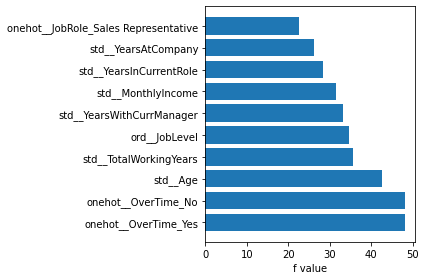

In [178]:
from sklearn.feature_selection import f_regression, mutual_info_regression
from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.feature_selection import SelectKBest

feature_names = preprocessor.get_feature_names_out()
feature_names = np.array(feature_names)

f_test, p_values = f_classif(X_train_prep, y_train)
indices = np.argsort(f_test)[::-1]
print(f_test[indices[:10]])

plt.barh(np.arange(len(indices[:10])),f_test[indices[:10]] )
plt.yticks(ticks = np.arange(len(indices[:10]),dtype=int),labels = feature_names[indices[:10]])
plt.xlabel('f value')
plt.tight_layout()
plt.show()

[Text(0.5, 1.0, 'Corrlation of features')]

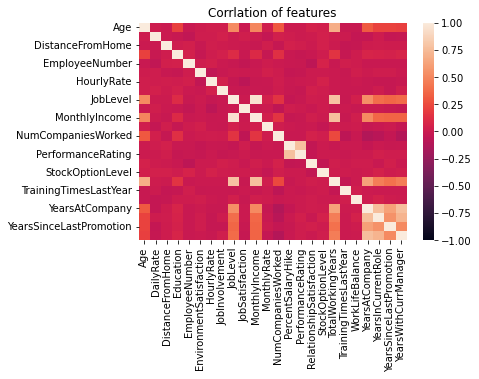

In [179]:
import matplotlib.pyplot as plt
import seaborn as sns
corr = df.corr(method='pearson')
P3heat = sns.heatmap(corr,vmin=-1, vmax=1,annot = False)
P3heat.set(title='Corrlation of features')

In [180]:
df.corr()>0.5

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,True,False,False,False,False,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
DailyRate,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
DistanceFromHome,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Education,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
EmployeeNumber,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
EnvironmentSatisfaction,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
HourlyRate,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
JobInvolvement,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
JobLevel,True,False,False,False,False,False,False,False,True,False,...,False,False,False,True,False,False,True,False,False,False
JobSatisfaction,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [198]:
df.info

<bound method DataFrame.info of       Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education Education